# Power_Consumption_prediction

Importing necessary libraries

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [221]:
df_ini=pd.read_csv('City Power Consumption.csv')

# EDA

In [222]:
df_ini.shape

(52583, 9)

In [223]:
df_ini

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


Obsevations:-
1.We have the dataset city power consuption with 52583 rows and 9 columns.
2.Column 'S no' is just indicating serial number, it has no significane in prediction.
3.We have a Linear regression model and the target variable is 'Power Consumption in A Zone'.

In [224]:
columns=df_ini.columns

In [225]:
columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

In [226]:
#Correcting the column name without space
df_ini['Power Consumption in A Zone']=df_ini[' Power Consumption in A Zone']
df_ini=df_ini.drop(columns=[' Power Consumption in A Zone'],axis=1)

In [227]:
df_ini.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', 'Power Consumption in A Zone'],
      dtype='object')

In [228]:
# as S no has no significance in prediction, dropping S no is appropriate.
df=df_ini.drop('S no',axis=1)

In [229]:
df.isna().sum()

Temperature                    320
Humidity                        25
Wind Speed                      71
general diffuse flows          308
diffuse flows                   15
Air Quality Index (PM)          18
Cloudiness                       0
Power Consumption in A Zone      0
dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature                  52263 non-null  object 
 1   Humidity                     52558 non-null  object 
 2   Wind Speed                   52512 non-null  object 
 3   general diffuse flows        52275 non-null  float64
 4   diffuse flows                52568 non-null  float64
 5   Air Quality Index (PM)       52565 non-null  float64
 6   Cloudiness                   52583 non-null  int64  
 7   Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ MB


In [231]:
df.describe()

,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,182.964247,74.872330,154.499191,0.009338,31061.821779
std,264.571351,124.084858,2.871553,0.096180,8021.057455
min,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,320.100000,100.500000,157.000000,0.000000,36721.582445
max,1163.000000,936.000000,159.000000,1.000000,52204.395120


# Univariate analysis

In [232]:
#Extensive study on column "Temperature"
#function for observing dtypes
def dtype_set (x):
    c=0
    y=[]
    for i in df[x]:
        y.append(type(i))
        if type(i)==str:
            c=c+1
    print('dtypes :',set(y))
    print('str_count:',c)
    print('float_count:',len(y)-c)
    print('total observations:',len(y))

        

In [233]:
#Checking datatypes and its numbers
dtype_set ('Temperature')

dtypes : {<class 'str'>, <class 'float'>}
str_count: 52263
float_count: 320
total observations: 52583


Observation we can see:
str_count: 52263;
float_count: 320
numerical values present here are in string dtype and 'nan' are float dtypes

In [234]:
df['Temperature']=df['Temperature'].apply(lambda x:float(x))

ValueError: could not convert string to float: '5.488 dc'

In [236]:
l1=[]
for i in df['Temperature']:
    if type(i)==str:
        l1.append(i)
print(len(l1))

52263


In [237]:
v=[]
n=[]
for i in l1:
    c=re.findall('[0-9]+[.][0-9]+ [a-zA-Z]+',i)
    v.append(c)
for i in v:
    for j in i:
        n.append(j)
print(n)


['5.488 dc', '13.65 CD', '12.31 dc']


In [238]:
df['Temperature']=df['Temperature'].replace('5.488 dc','5.488')
df['Temperature']=df['Temperature'].replace('13.65 CD','13.65')
df['Temperature']=df['Temperature'].replace('12.31 dc','12.31')

In [239]:
df['Temperature']=df['Temperature'].apply(lambda x:float(x))

In [240]:
dtype_set ('Temperature')

dtypes : {<class 'float'>}
str_count: 0
float_count: 52583
total observations: 52583


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

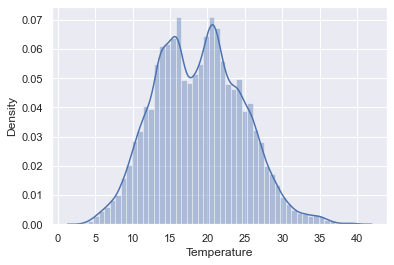

In [241]:
sns.distplot(df['Temperature'])

In [242]:
df['Temperature'].nunique()

3436

In [243]:
df['Temperature'].describe()

count    52263.000000
mean        18.827384
std          5.813293
min          3.247000
25%         14.430000
50%         18.820000
75%         22.910000
max         40.010000
Name: Temperature, dtype: float64

Observation:-
    When we see the distribution of Temperature column it almost looks like normaly distributed without skewness,
    when we see mean and median i.e,18.827384 and 18.820000 respectively we can fill 'nan' values with median


In [244]:
df['Temperature'].isna().sum()

320

In [245]:
df['Temperature']=df['Temperature'].fillna(18.82)

In [246]:
df['Temperature'].isna().sum()

0

<AxesSubplot:xlabel='Temperature'>

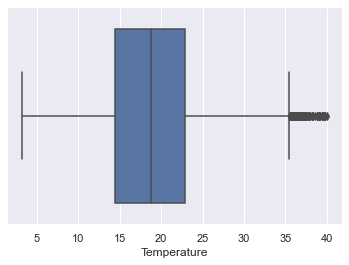

In [247]:
sns.boxplot(df['Temperature'])

There are outlaiers which are need to be treated.

In [248]:
# Extensive study on column 'Humidity'
dtype_set ('Humidity')

dtypes : {<class 'str'>, <class 'float'>}
str_count: 52558
float_count: 25
total observations: 52583


Observation we can see:
    str_count: 52558; float_count: 25 numerical values present here are in string dtype and 'nan' are float dtypes

In [249]:
df['Humidity']=df['Humidity'].apply(lambda x:float(x))

ValueError: could not convert string to float: '84.8 i'

In [250]:
l1h=[]
for i in df['Humidity']:
    if type(i)==str:
        l1h.append(i)
print(len(l1h))

52558


In [251]:
vh=[]
nh=[]
for i in l1h:
    c=re.findall('[0-9]+[.][0-9]+ [a-zA-Z]+',i)
    vh.append(c)
for i in vh:
    for j in i:
        nh.append(j)
print(nh)

['84.8 i']


In [252]:
df['Humidity']=df['Humidity'].replace('84.8 i','84.8')

In [253]:
df['Humidity']=df['Humidity'].apply(lambda x:float(x))

In [254]:
dtype_set ('Humidity')

dtypes : {<class 'float'>}
str_count: 0
float_count: 52583
total observations: 52583


<AxesSubplot:xlabel='Humidity', ylabel='Count'>

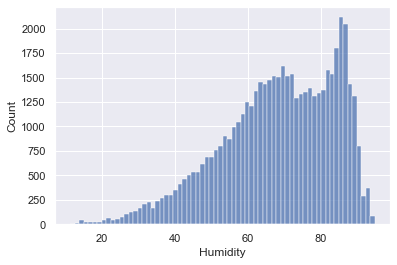

In [255]:
sns.histplot(df['Humidity'])

In [256]:
df['Humidity'].nunique()

4443

In [257]:
df['Humidity'].describe()

count    52558.00000
mean        68.28577
std         15.54517
min         11.34000
25%         58.33000
50%         69.88500
75%         81.40000
max         94.80000
Name: Humidity, dtype: float64

Observation:-
When we see the distribution of Humidity column it almost looks like leftskewed distribution, when we see mean and median i.e,68.28577 and 69.88500 respectively we can fill 'nan' values with median as we have left skewed distribution.

In [258]:
df['Humidity'].isna().sum()

25

In [259]:
df['Humidity']=df['Humidity'].fillna(69.88500)

In [260]:
df['Humidity'].isna().sum()

0

<AxesSubplot:xlabel='Humidity'>

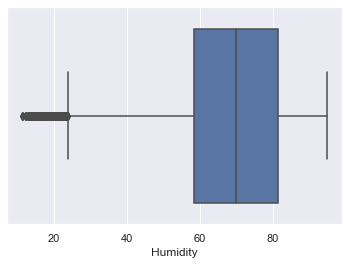

In [261]:
sns.boxplot(df['Humidity'])

There are outlaiers which are need to be treated.

In [262]:
# Extensive study on column'Wind Speed'
dtype_set ('Wind Speed')

dtypes : {<class 'str'>, <class 'float'>}
str_count: 52512
float_count: 71
total observations: 52583


Observation we can see:
    str_count: 52512; float_count: 71 numerical values present here are in string dtype and 'nan' are float dtypes

In [263]:
df['Wind Speed']=df['Wind Speed'].apply(lambda x:float(x))

ValueError: could not convert string to float: '8.50%'

In [264]:
l1ws=[]
for i in df['Wind Speed']:
    if type(i)==str:
        l1ws.append(i)
print(len(l1ws))

52512


In [265]:
vws=[]
nws=[]
for i in l1ws:
    c=re.findall('[0-9]+[.][0-9]+[%]+',i)
    vws.append(c)
for i in vws:
    for j in i:
        nws.append(j)
print(nws)

['8.50%', '8.50%', '8.50%', '8.50%']


In [266]:
df['Wind Speed']=df['Wind Speed'].replace('8.50%','8.50')

In [267]:
df['Wind Speed']=df['Wind Speed'].apply(lambda x:float(x))

In [268]:
dtype_set ('Wind Speed')

dtypes : {<class 'float'>}
str_count: 0
float_count: 52583
total observations: 52583


<AxesSubplot:xlabel='Wind Speed', ylabel='Count'>

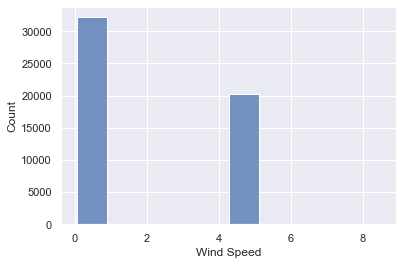

In [269]:
sns.histplot(df['Wind Speed'],bins=10)

In [270]:
df['Wind Speed'].describe()

count    52512.000000
mean         1.955961
std          2.348552
min          0.050000
25%          0.078000
50%          0.086000
75%          4.915000
max          8.500000
Name: Wind Speed, dtype: float64

In [271]:
df['Wind Speed'].nunique()

549

Observation:
    When we see the distribution of WindSpeed column the distribution is not following normal distribution, when we see mean and median i.e,1.955961 and 0.086000 respectively we can fill 'nan' values with median. Most of the values are near 1 and 4.5


In [272]:
df['Wind Speed'].isna().sum()

71

In [273]:
df['Wind Speed']=df['Wind Speed'].fillna(0.086000)

In [274]:
df['Wind Speed'].isna().sum()

0

<AxesSubplot:xlabel='Wind Speed'>

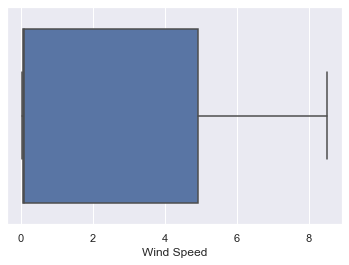

In [275]:
sns.boxplot(df['Wind Speed'])

There are no out liers here but data transformation is needed.

In [276]:
# Extensive study on column 'general diffuse flows'
dtype_set ('general diffuse flows')

dtypes : {<class 'float'>}
str_count: 0
float_count: 52583
total observations: 52583


<AxesSubplot:xlabel='general diffuse flows', ylabel='Count'>

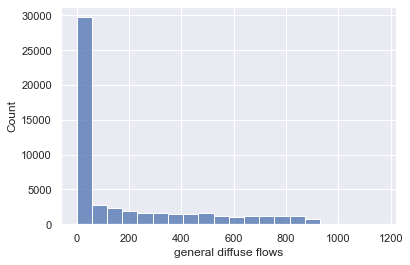

In [277]:
sns.histplot(df['general diffuse flows'],bins=20)

In [278]:
df['general diffuse flows'].nunique()

10497

In [279]:
df['general diffuse flows'].isna().sum()

308

In [280]:
df['general diffuse flows'].describe()

count    52275.000000
mean       182.964247
std        264.571351
min          0.004000
25%          0.062000
50%          5.226000
75%        320.100000
max       1163.000000
Name: general diffuse flows, dtype: float64

Observation:-
    When we see the distribution of general diffuse flows column the distribution is not following normal distribution,It is highly right skewed when we see mean and median i.e,182.964247 and 5.226000 respectively we can fill 'nan' values with median.

In [281]:
df['general diffuse flows']=df['general diffuse flows'].fillna(5.226000)

In [282]:
df['general diffuse flows'].isna().sum()

0

<AxesSubplot:xlabel='general diffuse flows'>

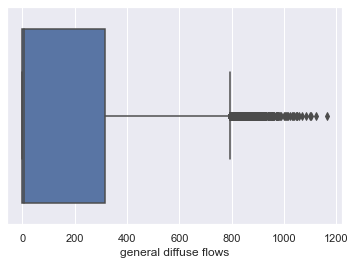

In [283]:
sns.boxplot(df['general diffuse flows'])

There are outlaiers which are need to be treated.

In [284]:
# Extensive study on column 'general diffuse flows'
dtype_set ('diffuse flows')

dtypes : {<class 'float'>}
str_count: 0
float_count: 52583
total observations: 52583


<AxesSubplot:xlabel='diffuse flows', ylabel='Count'>

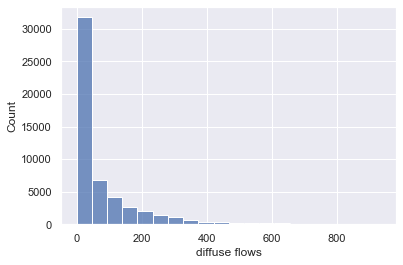

In [285]:
sns.histplot(df['diffuse flows'],bins=20)

In [286]:
df['diffuse flows'].nunique()

10449

In [287]:
df['diffuse flows'].isna().sum()

15

In [288]:
df['diffuse flows'].describe()

count    52568.000000
mean        74.872330
std        124.084858
min          0.011000
25%          0.122000
50%          4.412000
75%        100.500000
max        936.000000
Name: diffuse flows, dtype: float64

Observation:-
    When we see the distribution of diffuse flows column the distribution is not following normal distribution,It is highly right skewed when we see mean and median i.e,74.872330 and 4.412000 respectively we can fill 'nan' values with median.

In [289]:
df['diffuse flows']=df['diffuse flows'].fillna(4.412000)

In [290]:
df['diffuse flows'].isna().sum()

0

<AxesSubplot:xlabel='diffuse flows'>

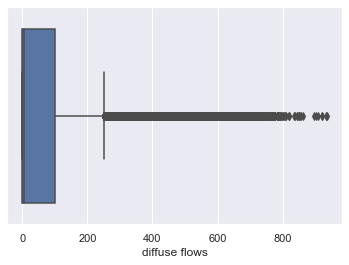

In [291]:
sns.boxplot(df['diffuse flows'])

There are outlaiers which are need to be treated.

In [292]:
# Extensive study on column 'general diffuse flows'
dtype_set ('Air Quality Index (PM)')

dtypes : {<class 'float'>}
str_count: 0
float_count: 52583
total observations: 52583


<AxesSubplot:xlabel='Air Quality Index (PM)', ylabel='Count'>

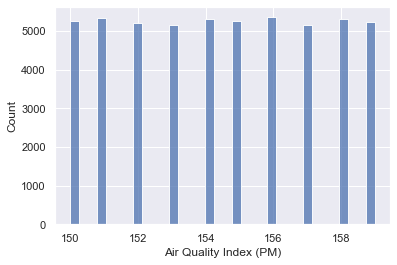

In [293]:
sns.histplot(df['Air Quality Index (PM)'])

In [294]:
df['Air Quality Index (PM)'].nunique()

10

Since we have just 10 unique values lets consider 'Air Quality Index (PM)' column as a categorical variable

In [295]:
df['Air Quality Index (PM)'].isna().sum()

18

In [296]:
df['Air Quality Index (PM)'].describe()

count    52565.000000
mean       154.499191
std          2.871553
min        150.000000
25%        152.000000
50%        155.000000
75%        157.000000
max        159.000000
Name: Air Quality Index (PM), dtype: float64

In [297]:
df['Air Quality Index (PM)'].mode()

0    156.0
Name: Air Quality Index (PM), dtype: float64

Observation:
    When we see the distribution of diffuse flows column the distribution is following normal distribution, when we see mean and median i.e,154.499191 and 156.000000 respectively we can fill 'nan' values with mode.

In [298]:
df['Air Quality Index (PM)']=df['Air Quality Index (PM)'].fillna(156.000000)

In [299]:
df['Air Quality Index (PM)'].isna().sum()

0

<AxesSubplot:xlabel='Air Quality Index (PM)'>

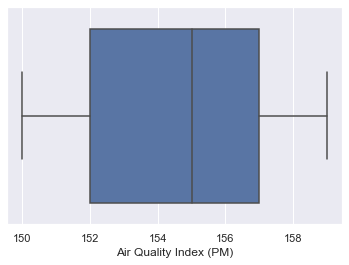

In [300]:
sns.boxplot(df['Air Quality Index (PM)'])

In [301]:
# Extensive study on column 'Cloudiness'
dtype_set ('Cloudiness')


dtypes : {<class 'int'>}
str_count: 0
float_count: 52583
total observations: 52583


In [302]:
df['Cloudiness'].nunique()

2

Column 'Cloudiness' is a binary variable as it contains oly two variable 1 and 0

In [303]:
df['Cloudiness'].isna().sum()

0

<AxesSubplot:xlabel='Cloudiness', ylabel='count'>

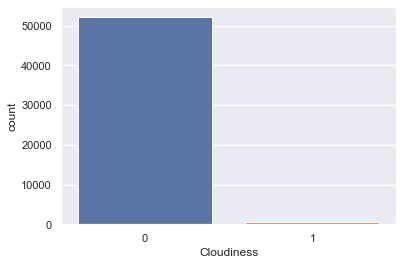

In [304]:
sns.countplot(df['Cloudiness'])

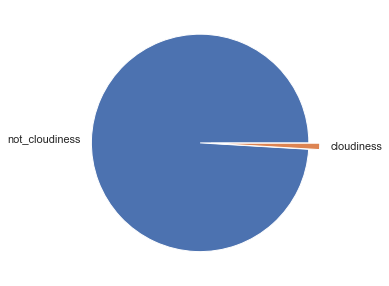

In [305]:
plt.figure(figsize=(5,5))
explode = [0, 0.1]
plt.pie(df['Cloudiness'].value_counts(),labels=['not_cloudiness','cloudiness'],explode=explode)
plt.show()

In [306]:
df_columns=df.columns

Outlier analysis

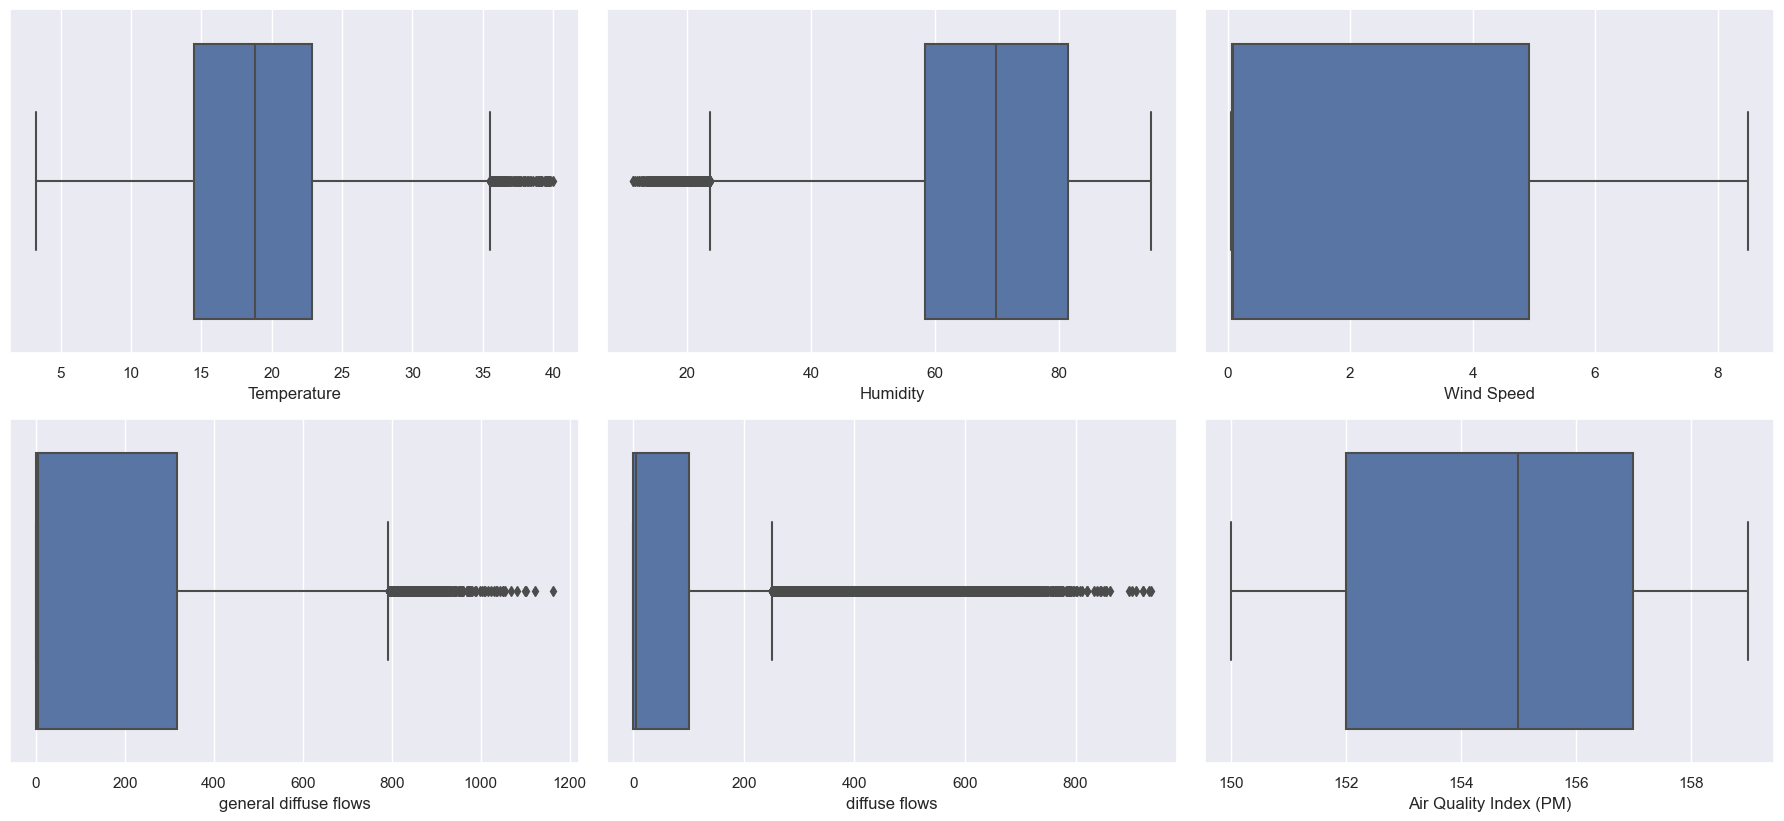

In [307]:
plt.figure(figsize=(18,12),dpi=100)
for i in range(len(df_columns)):
    if df_columns[i]!='Cloudiness' and df_columns[i]!='Power Consumption in A Zone':
        plt.subplot(3,3,i+1)
        sns.boxplot( df[df_columns[i]])
plt.tight_layout()

Distribution Analysis

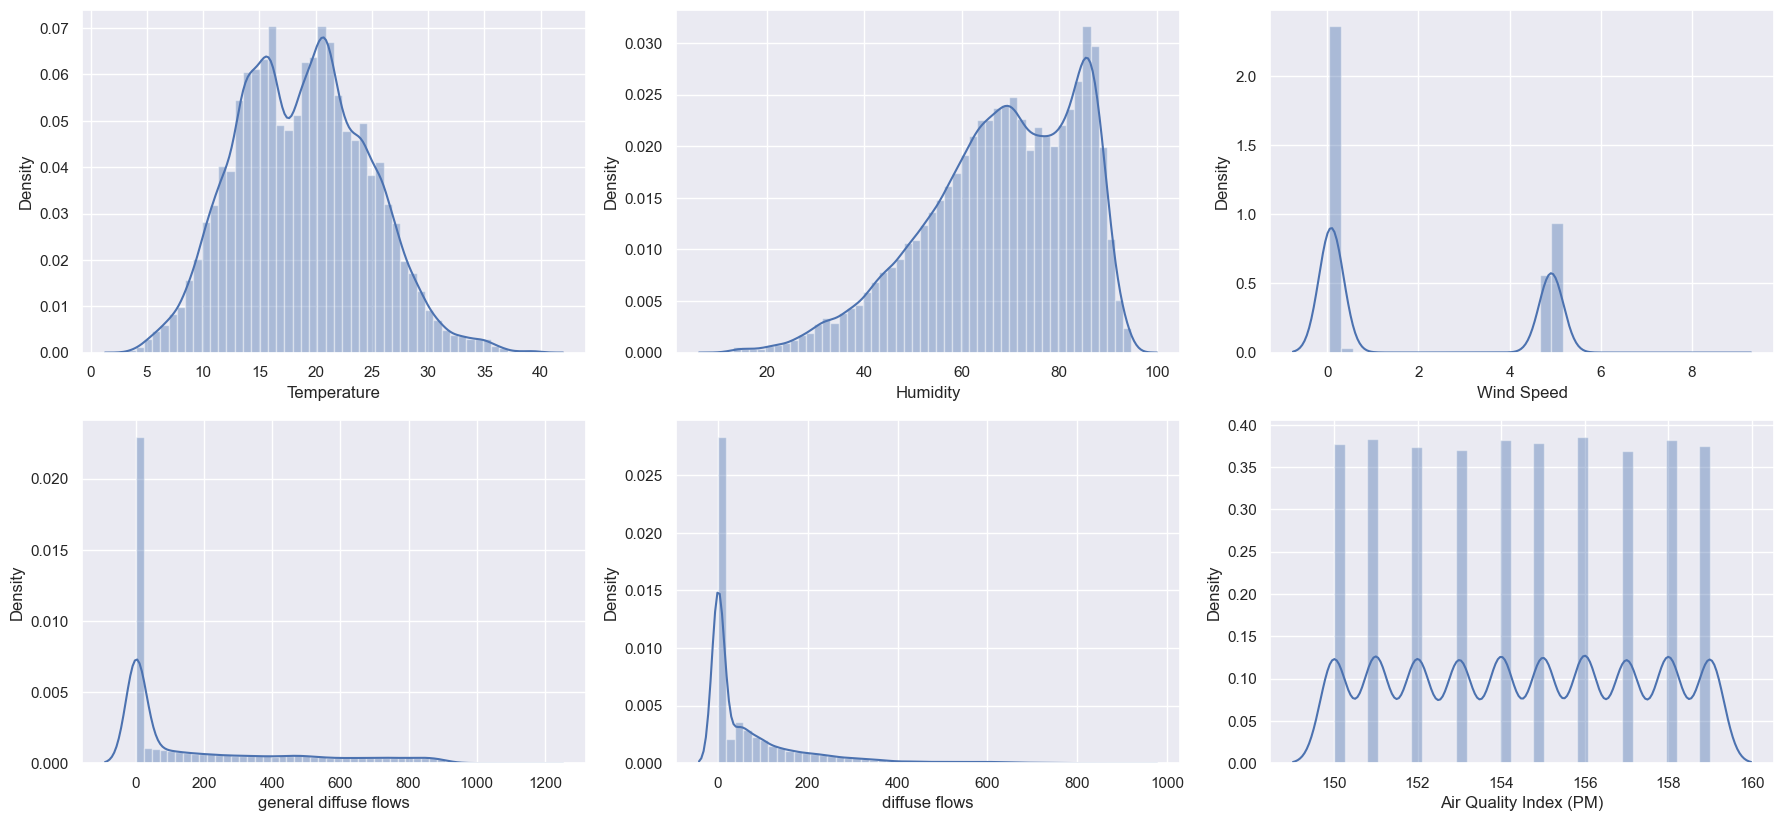

In [308]:
plt.figure(figsize=(18,12),dpi=100)
for i in range(len(df_columns)):
    if df_columns[i]!='Cloudiness' and df_columns[i]!='Power Consumption in A Zone':
        plt.subplot(3,3,i+1)
        sns.distplot( df[df_columns[i]])
plt.tight_layout()

Checking the relation between target and independent variables

# Bivariate Analysis

In [309]:
df.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness',
       'Power Consumption in A Zone'],
      dtype='object')

In [310]:
x=df.drop('Power Consumption in A Zone',axis=1)

In [311]:
y=df['Power Consumption in A Zone']

In [312]:
x_columns=x.columns

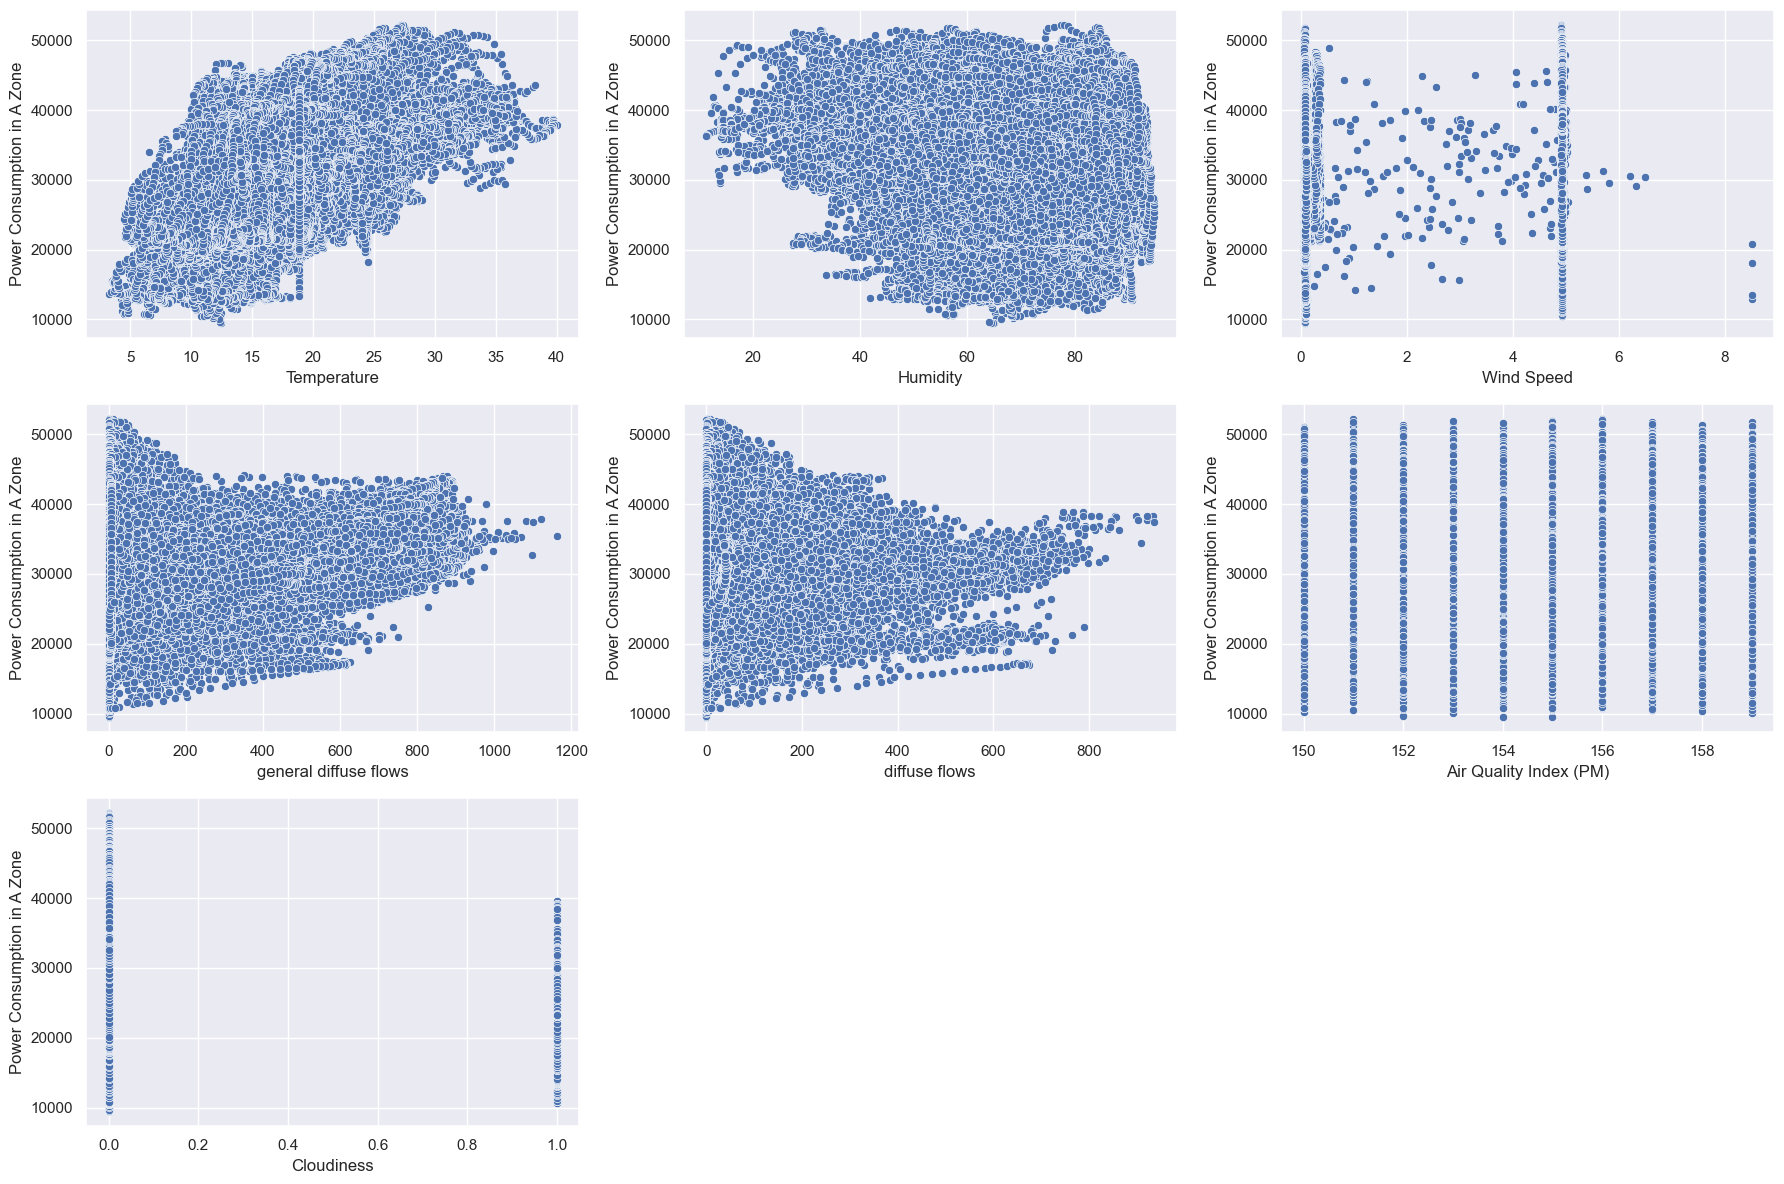

In [313]:
plt.figure(figsize=(18,12),dpi=100)
for i in range(len(x_columns)):
    plt.subplot(3,3,i+1)
    sns.scatterplot( x=df[x_columns[i]], y=df['Power Consumption in A Zone'])
plt.tight_layout()

Observations:- 
    When we observe the scatter plot of each independent variable with target variable columns 'Temperature','Humidity','general diffuse flows','diffuse flows' follow normal distribution and have some linear relationship with the target variable but we can see these exibit heteroscedasticity.

In [314]:
df['Power Consumption in A Zone'].isna().sum()

0

Finding the multicollinearity

<AxesSubplot:>

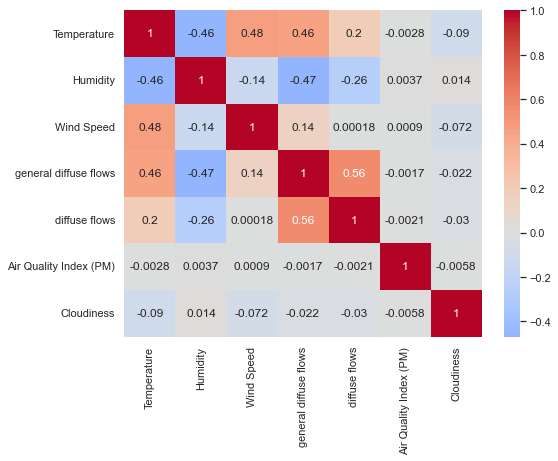

In [315]:
correlation_matrix=x.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [317]:
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]
    return vif_data

vif_df = calculate_vif(df)
print(vif_df)

                       Feature        VIF
0                  Temperature  27.582050
1                     Humidity  28.543847
2                   Wind Speed   2.250754
3        general diffuse flows   2.876300
4                diffuse flows   2.030377
5       Air Quality Index (PM)  63.649403
6                   Cloudiness   1.028242
7  Power Consumption in A Zone  23.715793


Temperature and Humidity are very vital variables so lets perform regularization technique so, there is no need to drop any important variable.

Observation:-
    We can see most of the variables are not much corelated 'windspeed','general diffuse flows',and ''diffuse flows' are slightly reated to 'Temperature' and 'geeral diffuse flow' and 'diffuse flow' are related.Lets not drop any of the variable.
    

# Preprocessing

Outlier treatrement
We can cap the outliers instead of droping the rows as we may loose some importat patterns by droping

In [318]:
def cap_outlier_q (data):
    q3=x[data].quantile(0.75)
    q1=x[data].quantile(0.25)
    iqr=q3-q1
    upper_bond=q3+1.5*iqr
    lower_bond=q1-1.5*iqr
    x[data].clip(lower_bond,upper_bond,inplace=True)

In [319]:
for i in x.columns:
    if i!='Power Consumption in A Zone':
        cap_outlier_q (i)        

In [320]:
from scipy.stats import skew
skewness=[]
for i in x.columns:
    variable_skewness = skew(x[i])
    skewness.append(variable_skewness)
print(skewness)

[0.17690950278360779, -0.5923795429695442, 0.4688827628780162, 1.243783487311554, 1.2044509438243554, -0.0021103946688816647, 0.0]


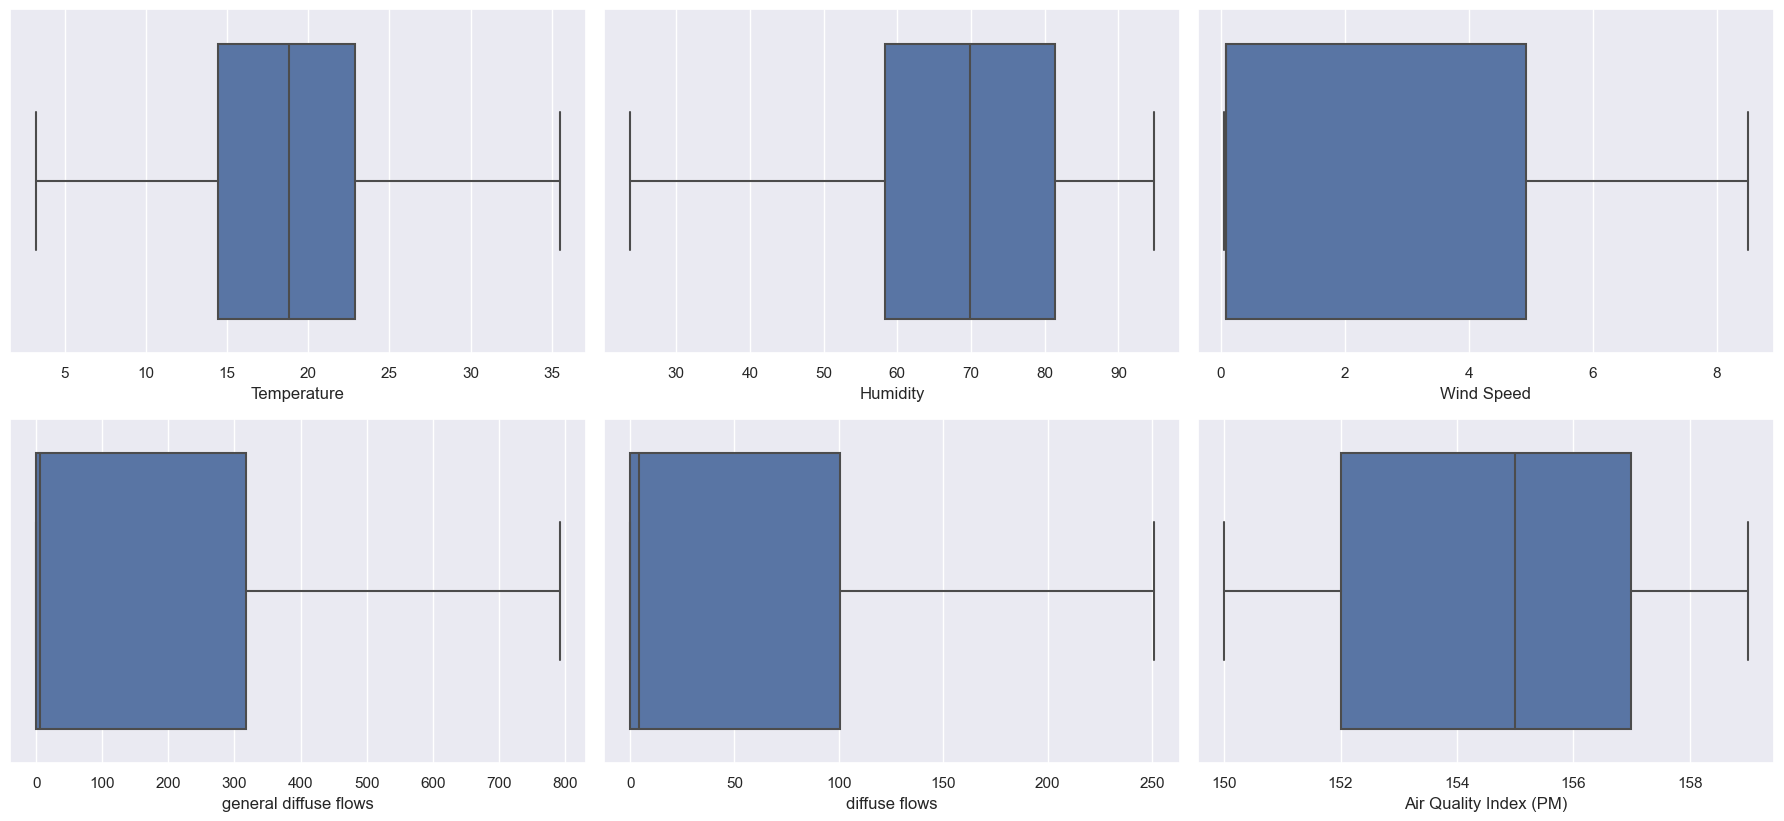

In [321]:
plt.figure(figsize=(18,12),dpi=100)
for i in range(len(x_columns)):
    if x_columns[i]!='Cloudiness':
        plt.subplot(3,3,i+1)
        sns.boxplot( x[x_columns[i]])
plt.tight_layout()

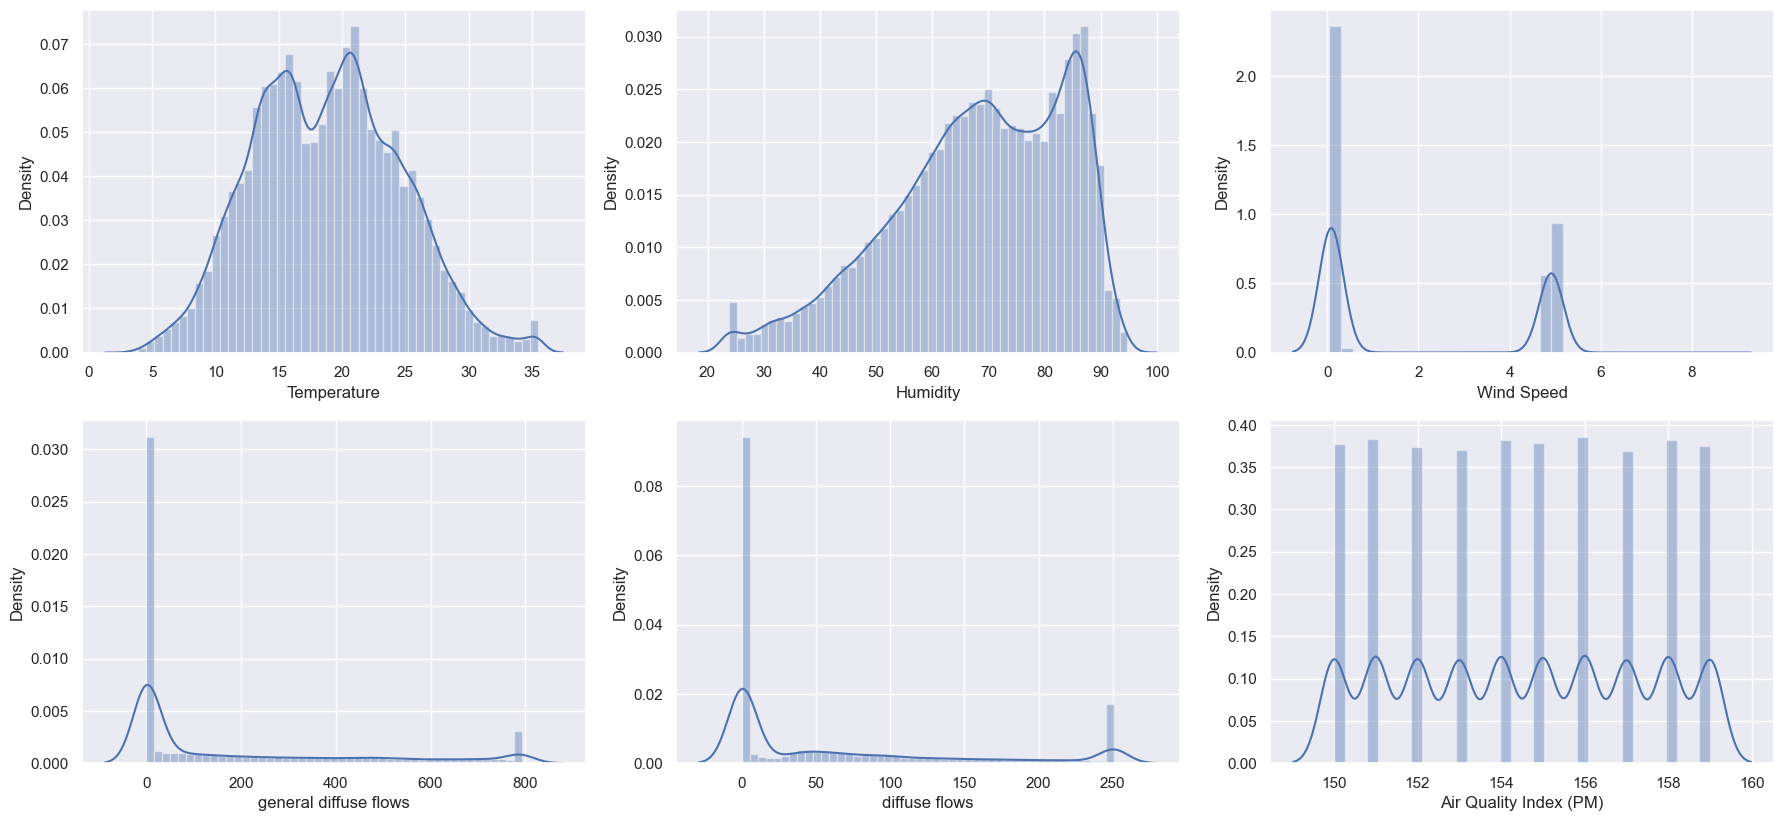

In [322]:
plt.figure(figsize=(18,12),dpi=100)
for i in range(len(x_columns)):
    if x_columns[i]!='Cloudiness':
        plt.subplot(3,3,i+1)
        sns.distplot( x[x_columns[i]])
plt.tight_layout()

In [323]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [324]:
for column in x[['Temperature', 'Humidity']]:
    x.loc[:,[column]]=pt.fit_transform(pd.DataFrame(x.loc[:,[column]]))

In [325]:

skewness=[]
for i in x.columns:
    variable_skewness = skew(x[i])
    skewness.append(variable_skewness)
print(skewness)

[-0.028716060348085708, -0.16107533657373113, 0.4688827628780162, 1.243783487311554, 1.2044509438243554, -0.0021103946688816647, 0.0]


In [326]:
for column in x[['Wind Speed', 'general diffuse flows','diffuse flows']]:
    x[column] = x[column].rank()

In [327]:
skewness=[]
for i in x.columns:
    variable_skewness = skew(x[i])
    skewness.append(variable_skewness)
print(skewness)

[-0.028716060348085708, -0.16107533657373113, 0.00031577324204694573, 0.00016659967830387357, -0.0028640045387939377, -0.0021103946688816647, 0.0]


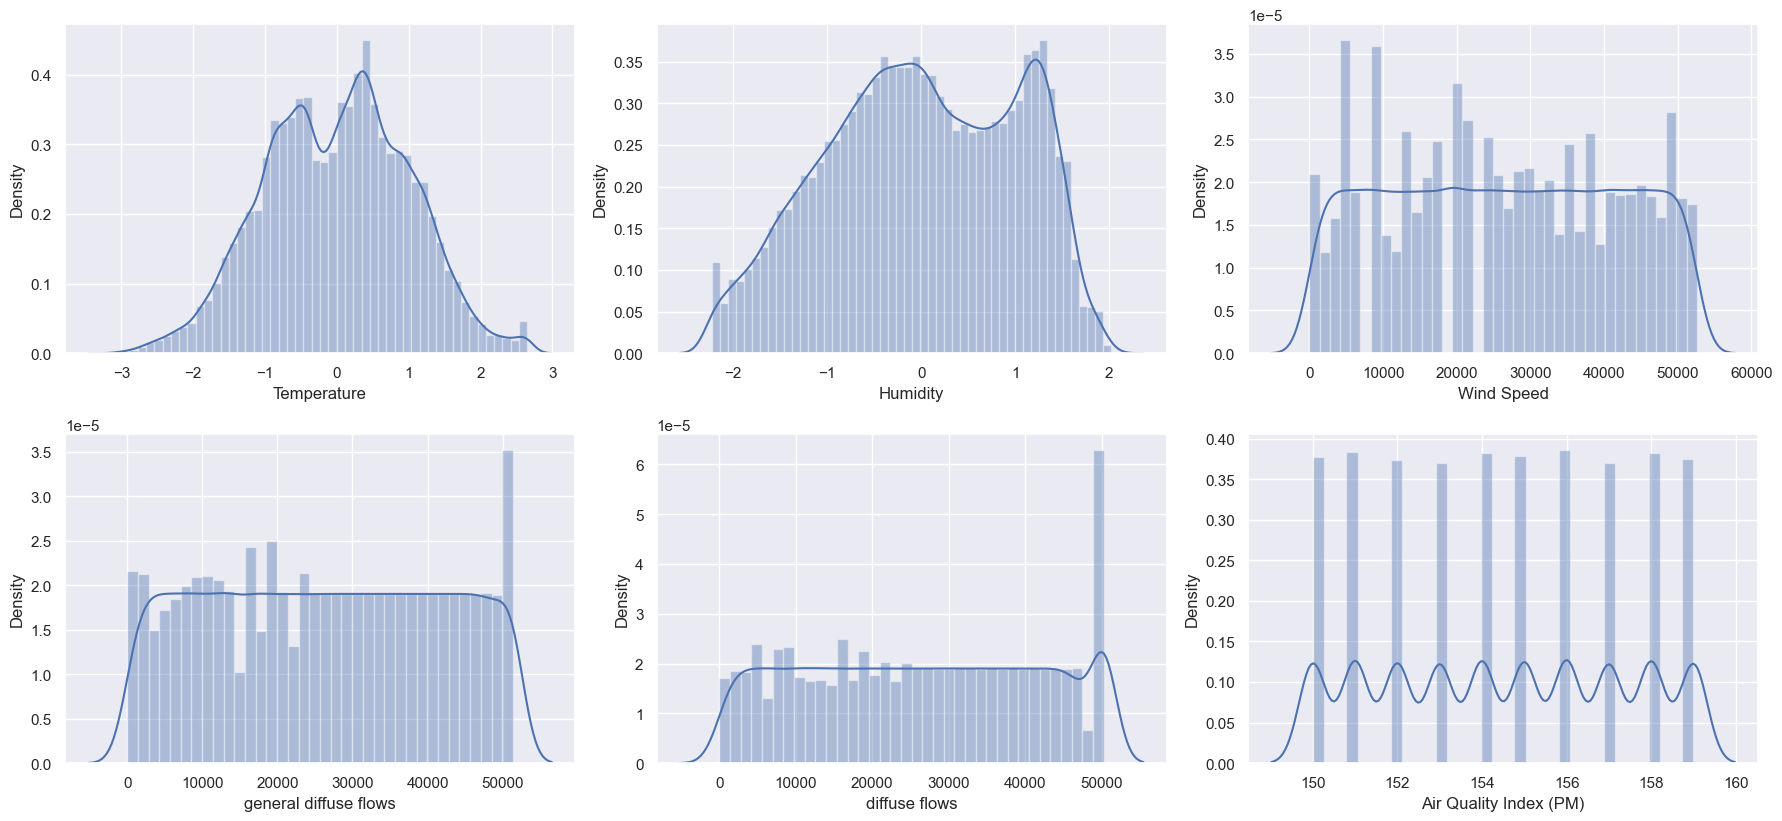

In [328]:
plt.figure(figsize=(18,12),dpi=100)
for i in range(len(x_columns)):
    if x_columns[i]!='Cloudiness':
        plt.subplot(3,3,i+1)
        sns.distplot( x[x_columns[i]])
plt.tight_layout()

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9999)

In [331]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [235]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "SVR": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Bayesian Regressor": BayesianRidge()}

In [113]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train=model.predict(X_train)
    mse = mean_squared_error(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    r2=r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R-squared": r2, "R-squared-train": r2_train})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

                         Model           MSE  R-squared  R-squared-train
0            Linear Regression  4.352708e+07   0.326184         0.325848
1             Ridge Regression  4.352710e+07   0.326183         0.325848
2             Lasso Regression  4.352726e+07   0.326181         0.325848
3                  Elastic Net  4.645425e+07   0.280870         0.283855
4                          SVR  6.146553e+07   0.048489         0.048286
5      Decision Tree Regressor  4.716745e+07   0.269829         0.999725
6                KNN Regressor  5.880775e+07   0.089633         0.385759
7  Gradient Boosting Regressor  3.686690e+07   0.429286         0.440323
8           Bayesian Regressor  4.352735e+07   0.326180         0.325848


In [114]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor

In [116]:
base_models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ("Elastic Net", ElasticNet())
    
]
meta_learner = LinearRegression()
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_learner)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
print(r2)

0.6307719919873706
